In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('accident_data.csv')
df.shape

(1048575, 34)

In [42]:
# 문자열 날짜,시간 -> 날짜형으로 변환
df['Date'] = pd.to_datetime(df['Date'])
# df['Date'].tail()
df['Time'] = pd.to_datetime(df['Time'])
df['Time'].tail()

1048570   2024-04-01 07:00:00
1048571   2024-04-01 03:00:00
1048572   2024-04-01 09:38:00
1048573   2024-04-01 18:25:00
1048574   2024-04-01 15:45:00
Name: Time, dtype: datetime64[ns]

In [43]:
Motorway_df = df[df['1st_Road_Class'] == 'Motorway']
Motorway_df

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
6296,200501ID00002,Motorway,4.0,Motorway,4.0,Slight,None,2005-05-01,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,50,2024-04-01 18:20:00,Urban,Fine no high winds,2005,No
6332,200501ID60040,Motorway,4.0,Motorway,4.0,Slight,None,2005-05-25,Wednesday,2.0,...,Metropolitan Police,Dry,Roundabout,None,30,2024-04-01 08:00:00,Urban,Fine no high winds,2005,No
6333,200501ID60041,Motorway,25.0,NaN,0.0,Serious,None,2005-06-22,Wednesday,2.0,...,Metropolitan Police,Dry,Dual carriageway,None,40,2024-04-01 10:45:00,Rural,Fine no high winds,2005,No
6338,200501ID60048,Motorway,4.0,Unclassified,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,2024-04-01 13:30:00,Urban,Fine no high winds,2005,No
7374,200501JI40304,Motorway,11.0,NaN,0.0,Slight,None,2005-05-18,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,50,2024-04-01 16:32:00,Rural,Fine no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046709,2.01062E+12,Motorway,4.0,NaN,0.0,Slight,None,2010-07-12,Tuesday,1.0,...,South Wales,Frost or ice,Dual carriageway,None,70,2024-04-01 17:55:00,Urban,Fine no high winds,2010,No
1046713,2.01062E+12,Motorway,4.0,NaN,0.0,Serious,None,2010-12-17,Friday,1.0,...,South Wales,Frost or ice,Dual carriageway,None,70,2024-04-01 00:35:00,Rural,Fine no high winds,2010,No
1046752,2.01062E+12,Motorway,4.0,NaN,0.0,Slight,None,2010-12-13,Monday,1.0,...,South Wales,Dry,Dual carriageway,None,70,2024-04-01 08:55:00,Rural,Fine no high winds,2010,No
1047238,201063AC41710,Motorway,4.0,A,48.0,Slight,None,2010-11-13,Saturday,1.0,...,Dyfed-Powys,Wet or damp,Roundabout,None,70,2024-04-01 05:57:00,Rural,Raining no high winds,2010,No


In [44]:
import missingno as msno

<Axes: >

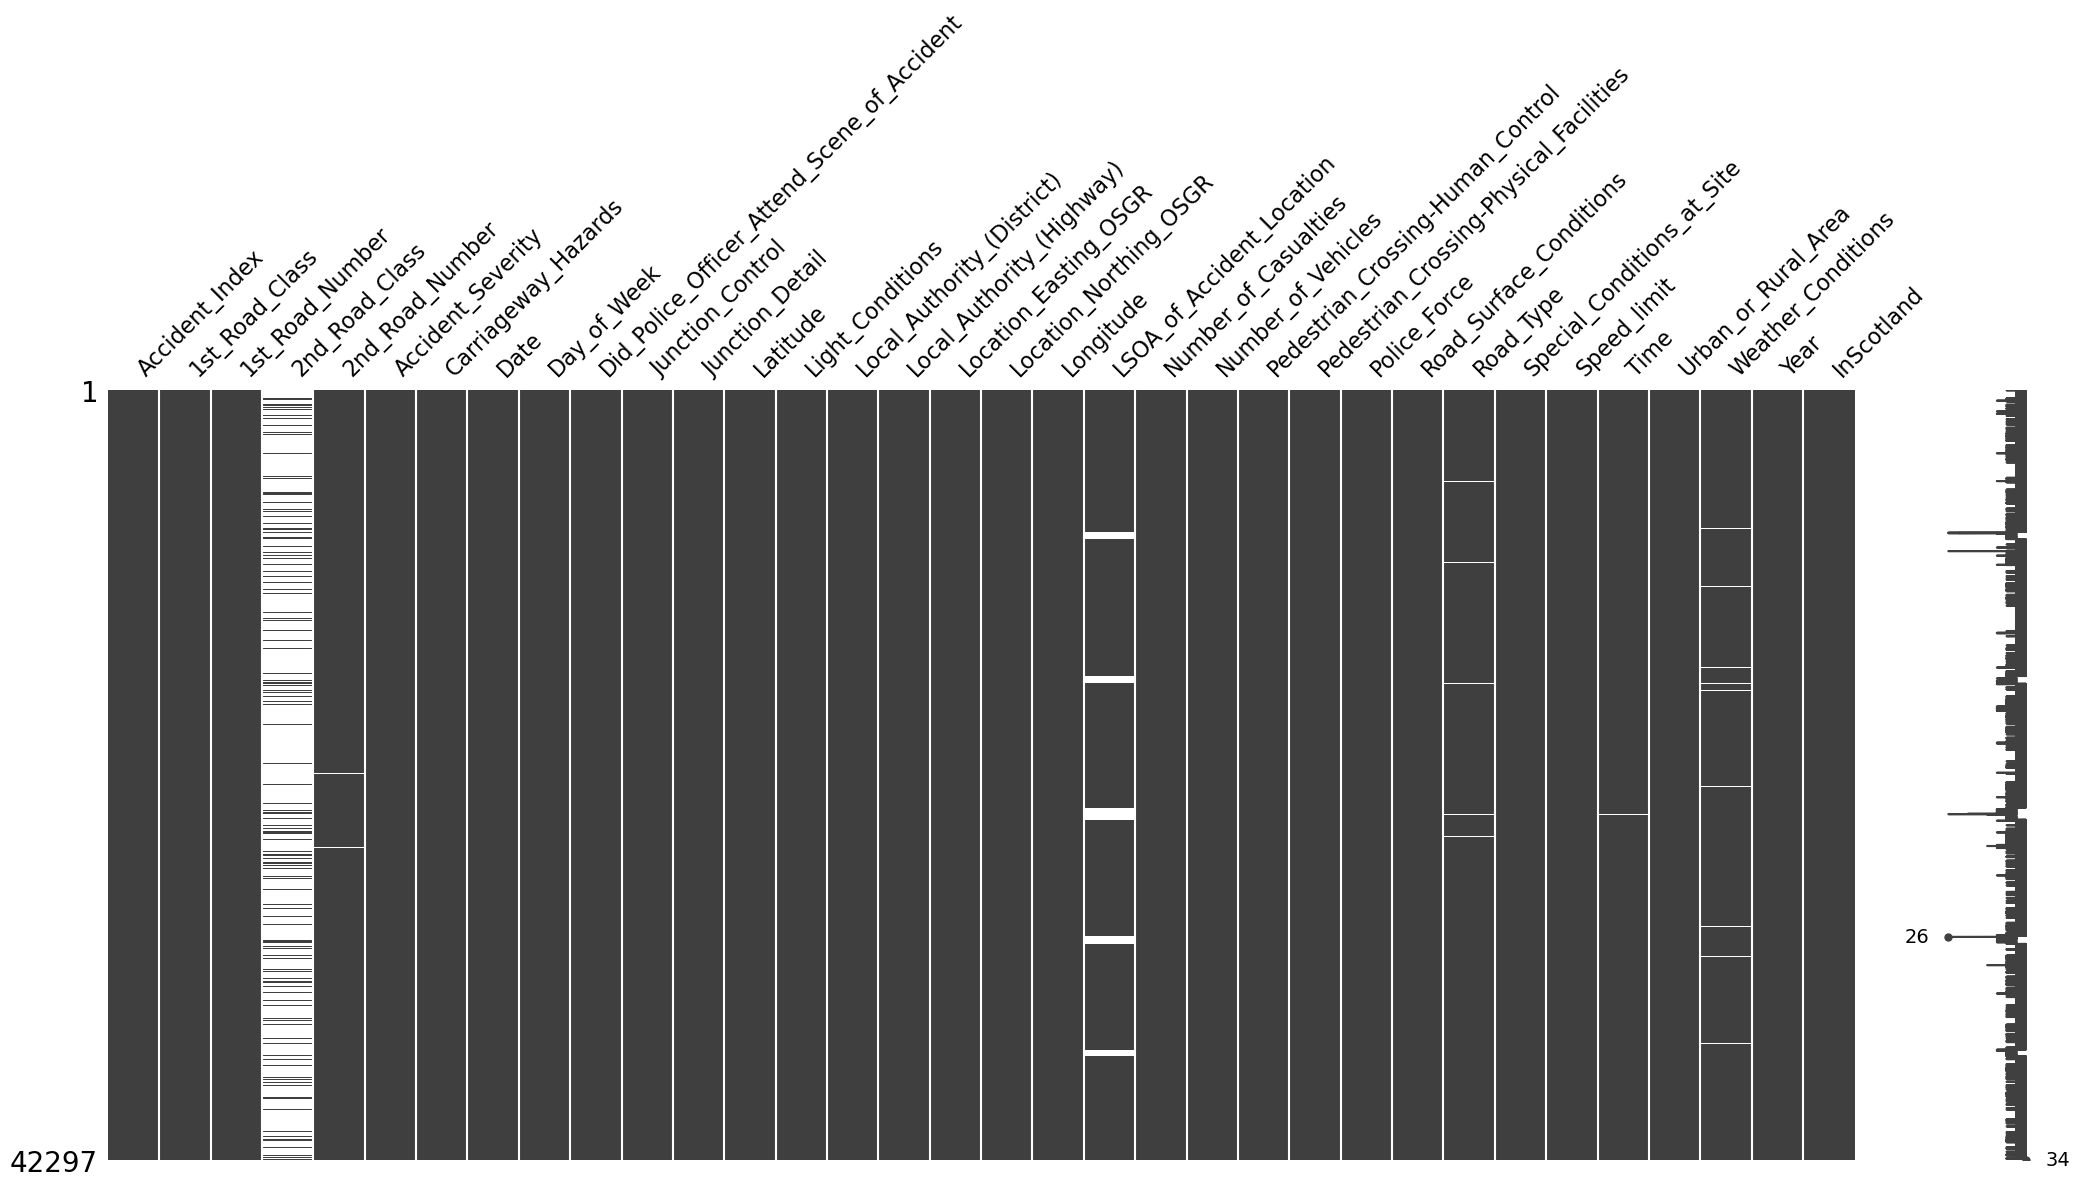

In [45]:
msno.matrix(Motorway_df)

In [46]:
Motorway_df_needed = Motorway_df[['Date','Time','Day_of_Week',
             'Number_of_Casualties','Number_of_Vehicles',
             'Road_Surface_Conditions','Weather_Conditions',
             'Speed_limit','Accident_Severity']]

Date                         0
Time                         1
Day_of_Week                  0
Number_of_Casualties         0
Number_of_Vehicles           0
Road_Surface_Conditions     34
Weather_Conditions         697
Speed_limit                  0
Accident_Severity            0
dtype: int64


<Axes: >

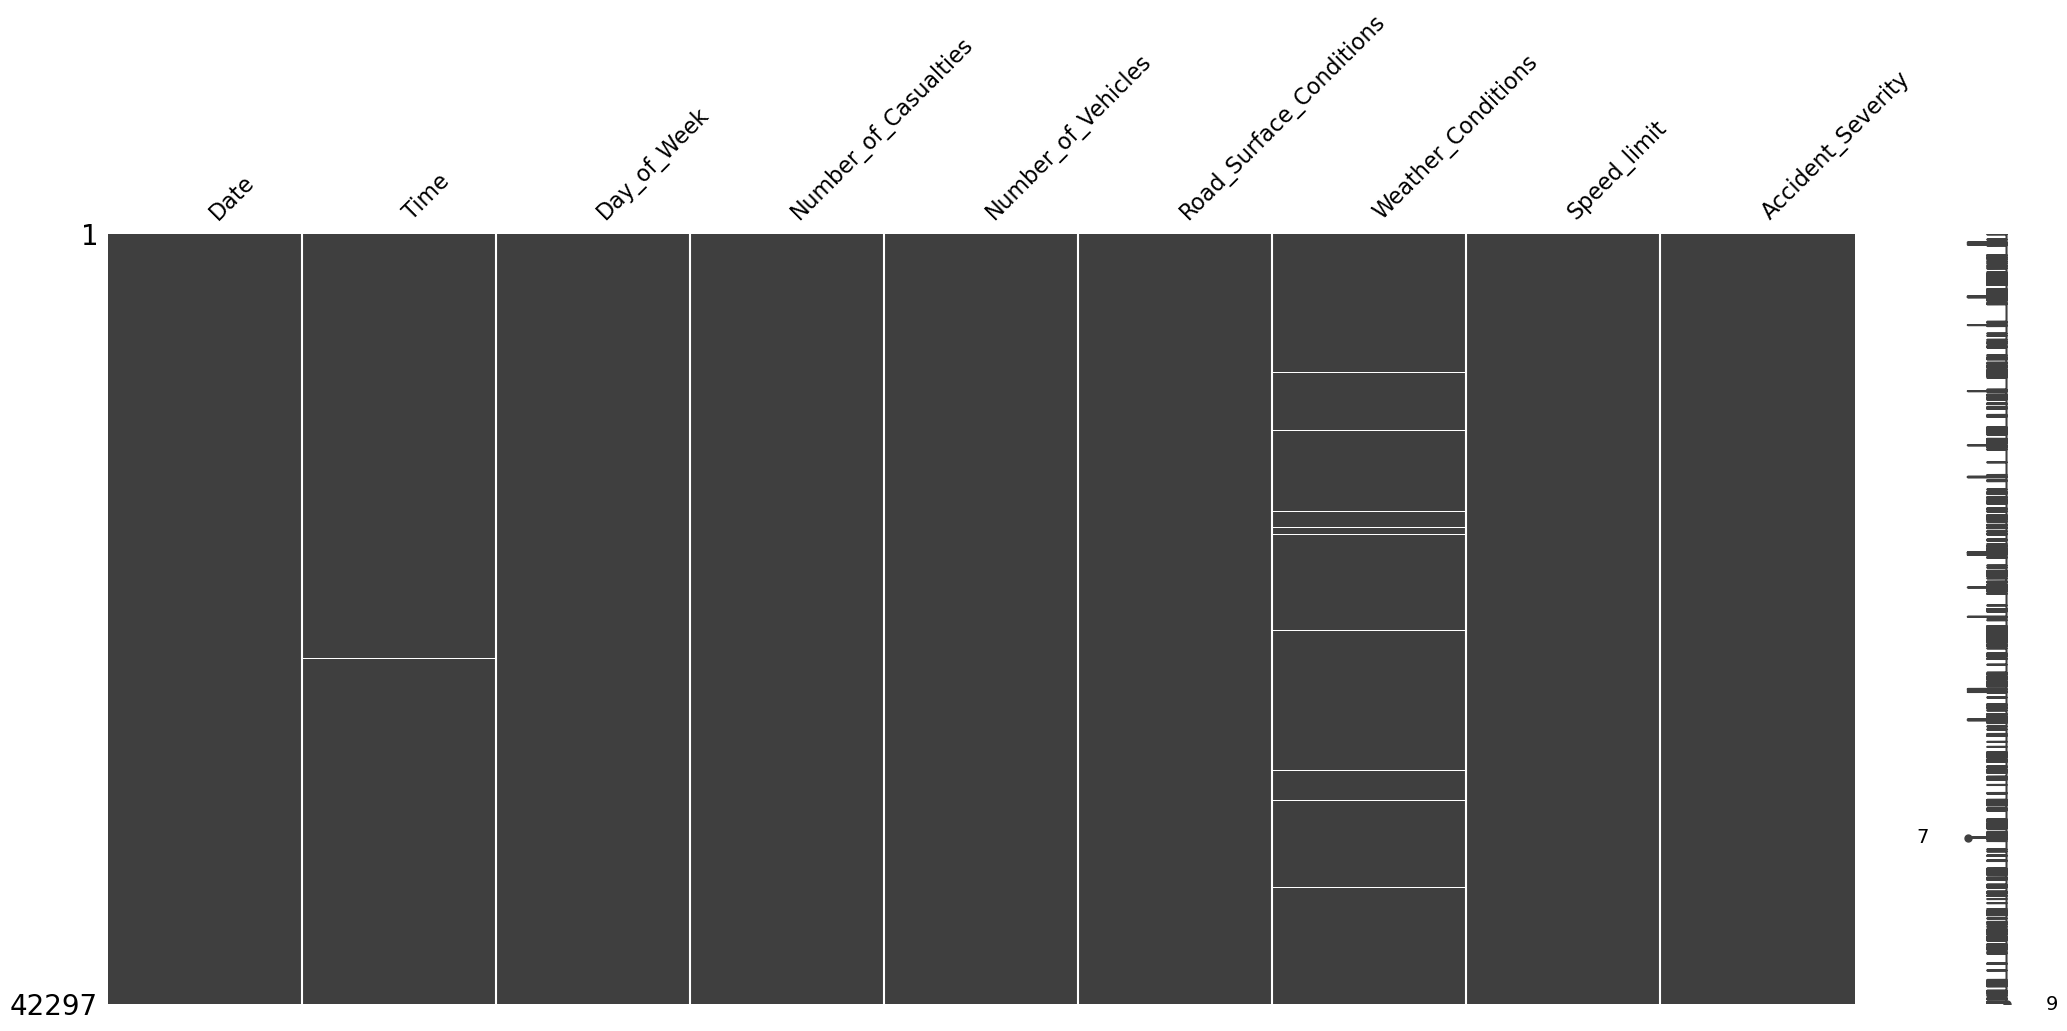

In [47]:
print(Motorway_df_needed.isnull().sum())
msno.matrix(Motorway_df_needed)

Date                       0
Time                       0
Day_of_Week                0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Weather_Conditions         0
Speed_limit                0
Accident_Severity          0
dtype: int64


<Axes: >

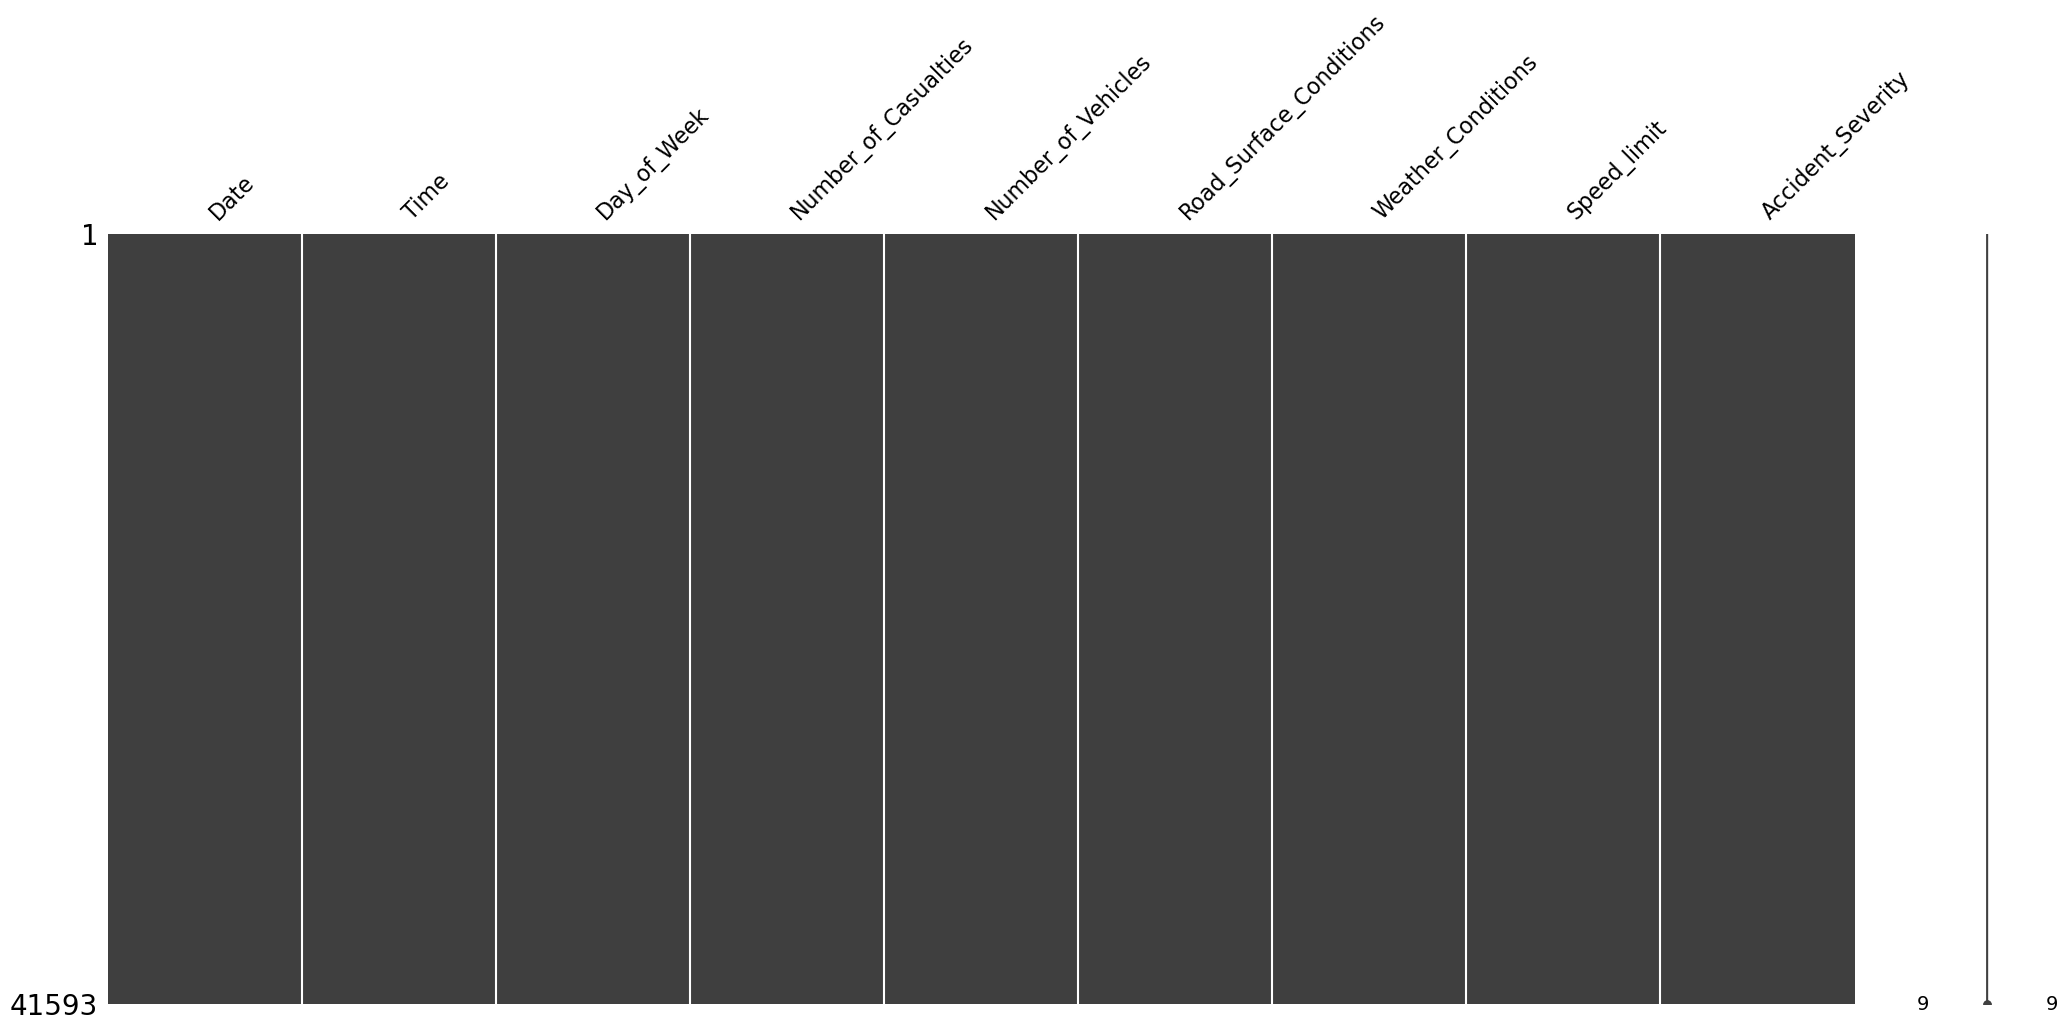

In [48]:
Motorway_df_needed = Motorway_df_needed.dropna()
print(Motorway_df_needed.isnull().sum())
msno.matrix(Motorway_df_needed)

In [49]:
Motorway_df_needed = Motorway_df_needed.sort_values(by='Date', ascending=True)

In [50]:
Motorway_df_needed.head(1)

,Date,Time,Day_of_Week,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Weather_Conditions,Speed_limit,Accident_Severity
105500,2005-01-01,2024-04-01 21:05:00,Saturday,2,2,Wet or damp,Fine + high winds,70,Slight


In [51]:
Motorway_df_needed.tail(1)

,Date,Time,Day_of_Week,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Weather_Conditions,Speed_limit,Accident_Severity
1024890,2010-12-31,2024-04-01 16:40:00,Friday,1,2,Dry,Fine no high winds,70,Slight


In [80]:
Motorway_df_needed['Accident_Severity'].value_counts()

Slight     36705
Serious     4103
Fatal        785
Name: Accident_Severity, dtype: int64

In [52]:
Severity_dummies = pd.get_dummies(Motorway_df_needed['Accident_Severity'])
Severity_dummies

,Fatal,Serious,Slight
105500,0,0,1
144426,0,0,1
194076,0,1,0
170061,0,1,0
123723,0,1,0
...,...,...,...
945644,0,0,1
945646,0,0,1
1009684,0,0,1
1005854,0,0,1


In [53]:
Severity_dummies.value_counts()

Fatal  Serious  Slight
0      0        1         36705
       1        0          4103
1      0        0           785
dtype: int64

<Axes: >

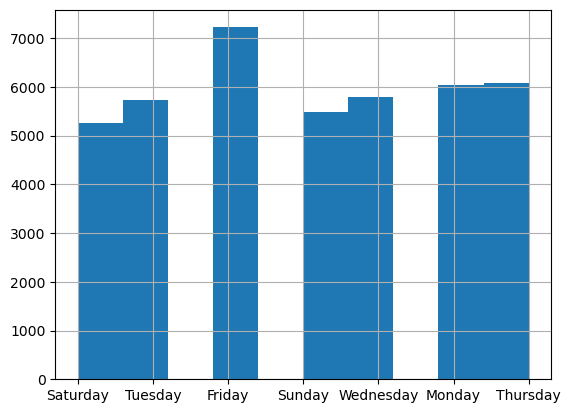

In [54]:
Motorway_df_needed['Day_of_Week'].hist()

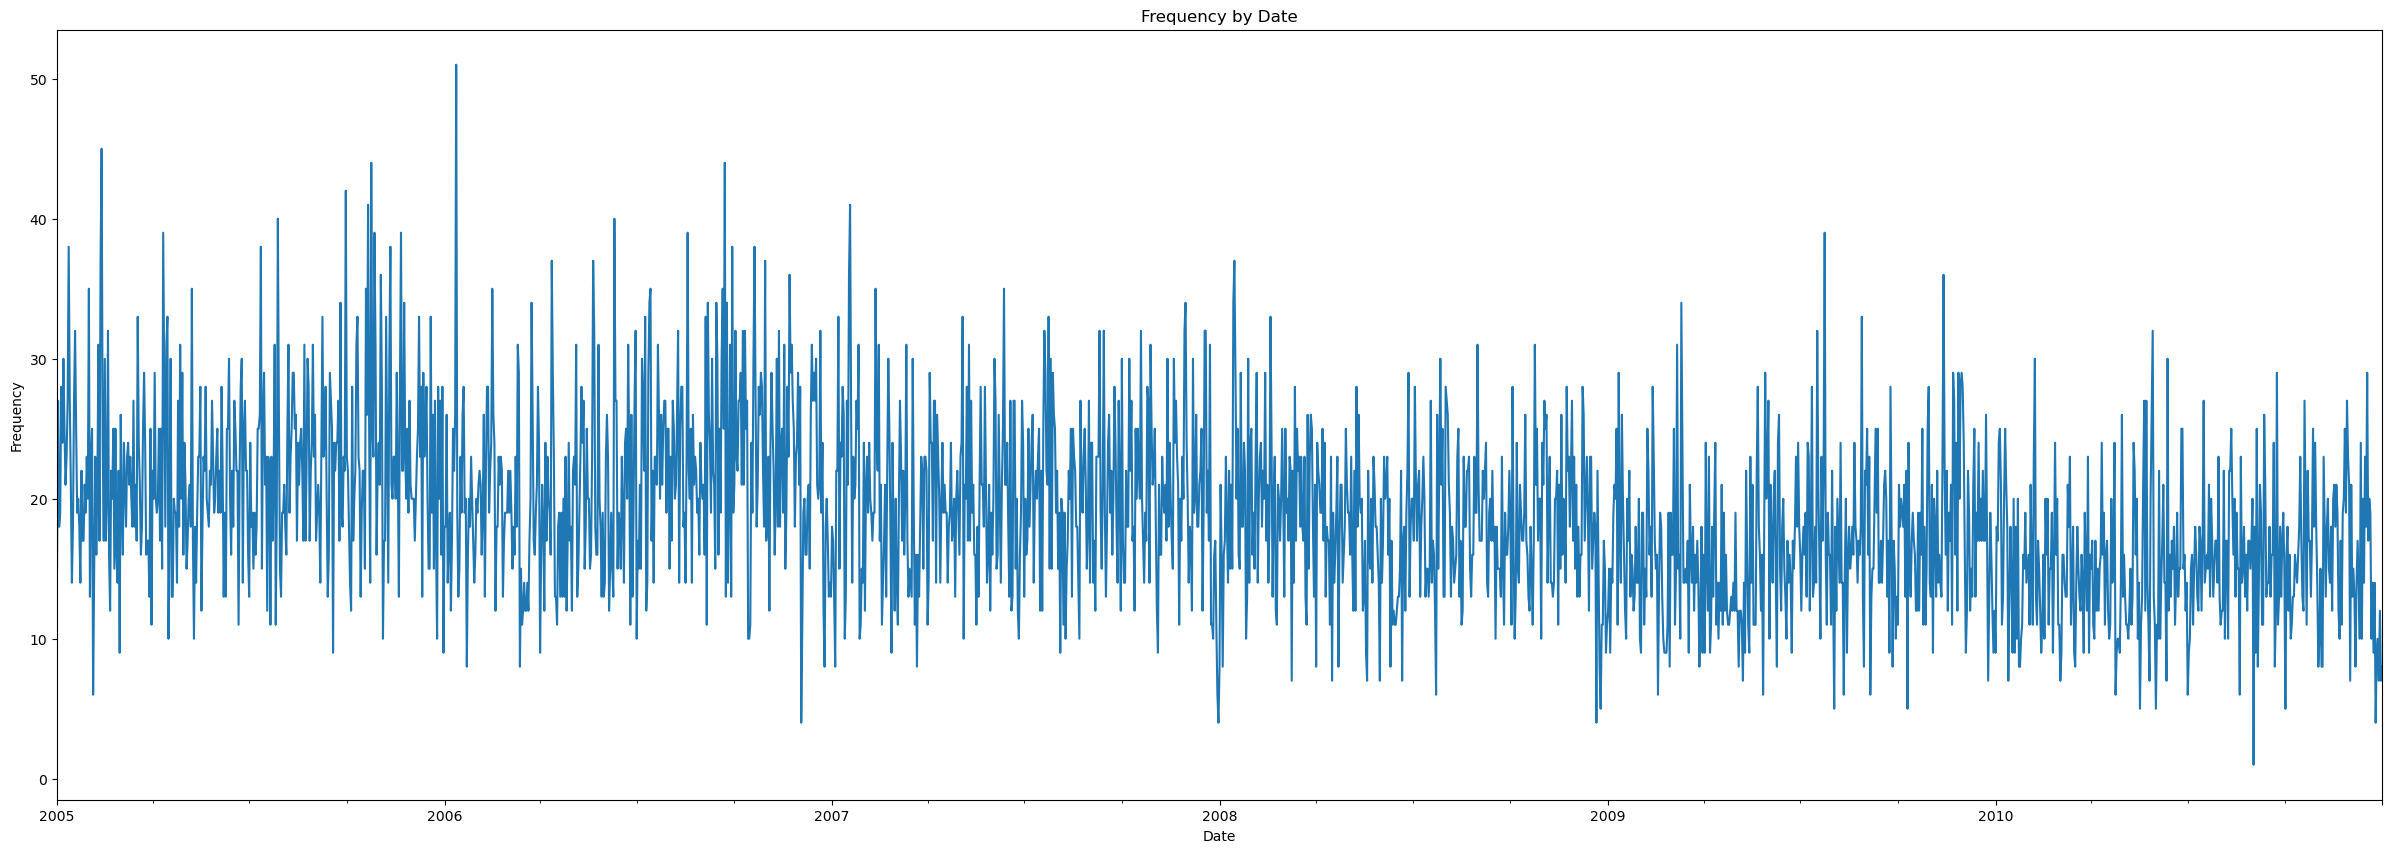

In [78]:
# 날짜별 빈도수 계산
#frequency_by_date = Motorway_df_needed.resample('D').size()

# 시계열 그래프 그리기
plt.figure(figsize=(30, 10))
frequency_by_date.plot()
plt.title('Frequency by Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


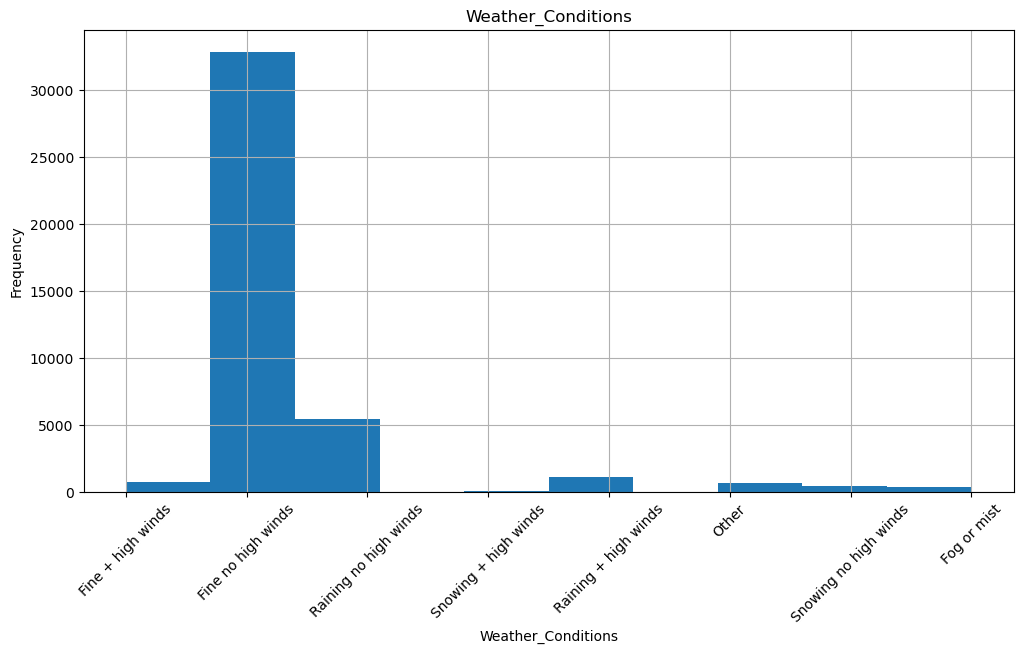

In [66]:
plt.figure(figsize=(12, 6))
Motorway_df_needed['Weather_Conditions'].hist()
plt.xlabel('Weather_Conditions')
plt.ylabel('Frequency')
plt.title('Weather_Conditions')
plt.xticks(rotation=45)

plt.show()

<Axes: >

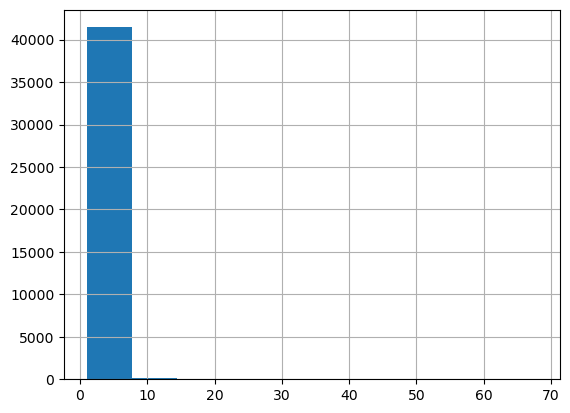

In [67]:
Motorway_df_needed['Number_of_Casualties'].hist()

<Axes: >

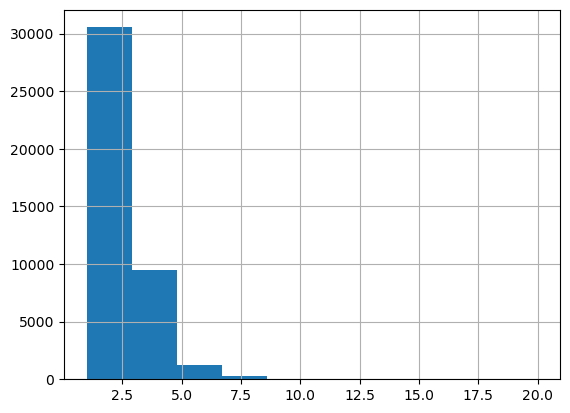

In [69]:
Motorway_df_needed['Number_of_Vehicles'].hist()

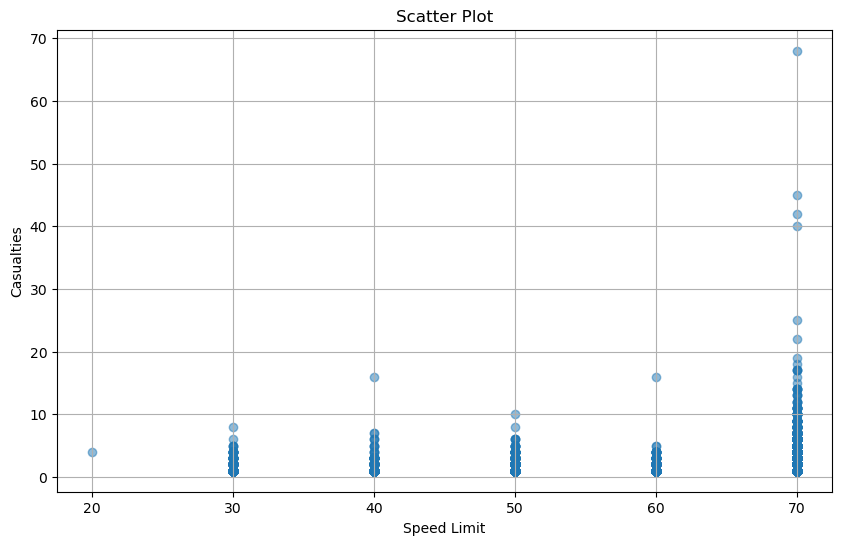

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(Motorway_df_needed['Speed_limit'], Motorway_df_needed['Number_of_Casualties'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Speed Limit')
plt.ylabel('Casualties')
plt.grid(True)
plt.show()